In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque


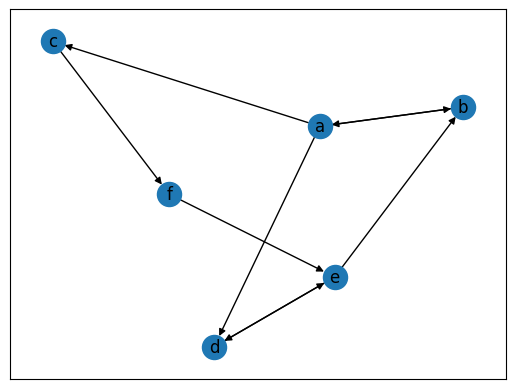

In [2]:
graph = nx.DiGraph()

graph.add_node('a')
graph.add_node('b')
graph.add_node('c')
graph.add_node('d')
graph.add_node('e')
graph.add_node('f')

graph.add_edge('a', 'b', weight=10)
graph.add_edge('a', 'c', weight=2)
graph.add_edge('a', 'd', weight=3)
graph.add_edge('b', 'a', weight=1)
graph.add_edge('c', 'f', weight=2)
graph.add_edge('d', 'e', weight=5)
graph.add_edge('e', 'b', weight=3)
graph.add_edge('e', 'd', weight=2)
graph.add_edge('f', 'e', weight=1)

nx.draw_networkx(graph)


In [3]:
def dijkstra(graph: nx.DiGraph, start: str, goal: str) -> deque[str]:
    distance: dict[str, float] = {}
    prev: dict[str, str] = {}
    queue: list[str] = []

    for node in graph.nodes:
        if node == start:
            distance[node] = 0
        else:
            distance[node] = float('inf')
        queue.append(node)

    while len(queue) > 0:
        u = min(queue, key=lambda x: distance[x])
        queue.remove(u)

        for v in graph.adj[u]:
            alt = distance[u] + graph.edges[u, v]['weight']
            if alt < distance[v]:
                distance[v] = alt
                prev[v] = u

    shortest_path: deque[str] = deque([goal])
    while goal != start:
        goal = prev[goal]
        shortest_path.appendleft(goal)

    return shortest_path


In [4]:
print("(a -> b)")
print("dijkstra:", ", ".join(dijkstra(graph, 'a', 'b')))
print("networkx:", ", ".join(nx.shortest_path(graph, 'a', 'b', weight='weight')))
print()
print("(a -> d)")
print("dijkstra:", ", ".join(dijkstra(graph, 'a', 'd')))
print("networkx:", ", ".join(nx.shortest_path(graph, 'a', 'd', weight='weight')))


(a -> b)
dijkstra: a, c, f, e, b
networkx: a, c, f, e, b

(a -> d)
dijkstra: a, d
networkx: a, d
